In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train = pd.DataFrame(train_data)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test = pd.DataFrame(test_data)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In the test set there is no 'survived' column

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Categorical features: Survived, Sex, Embarked

Ordinal features: Pclass

Continous Numerical: Age, Fare

Discrete Numerical: SibSp, Parch


In [5]:
train = train.drop(columns=['PassengerId','Ticket','Cabin'])
test = test.drop(columns=['Ticket','Cabin'])
train


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


Dropping useless columns, except Test's PassengerId because i need it for submission

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


There is a problem with missing values in embarked feauture and Age

In [8]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
survival_counts_sex = train.groupby('Sex')['Survived'].value_counts().unstack().fillna(0)
survival_counts_sex

Survived,0,1
Sex,,
female,81,233
male,468,109


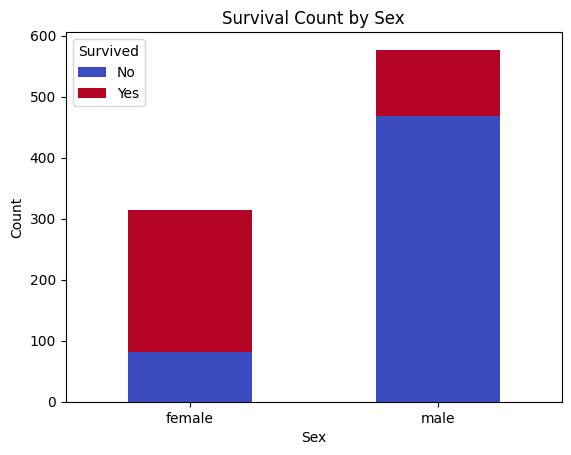

In [10]:
survival_counts_sex.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=0)  

plt.show()

In [11]:
survival_counts_embarked = train.groupby('Embarked')['Survived'].value_counts().unstack().fillna(0)
survival_counts_embarked

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


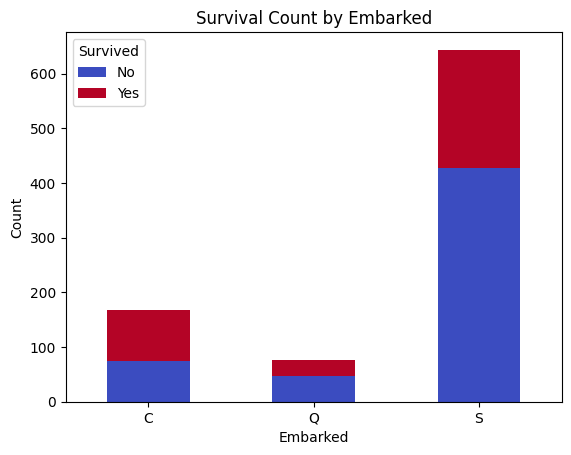

In [12]:
survival_counts_embarked.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=0)  

plt.show()

In [13]:
survival_counts_Pclass = train.groupby('Pclass')['Survived'].value_counts().unstack().fillna(0)
survival_counts_Pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


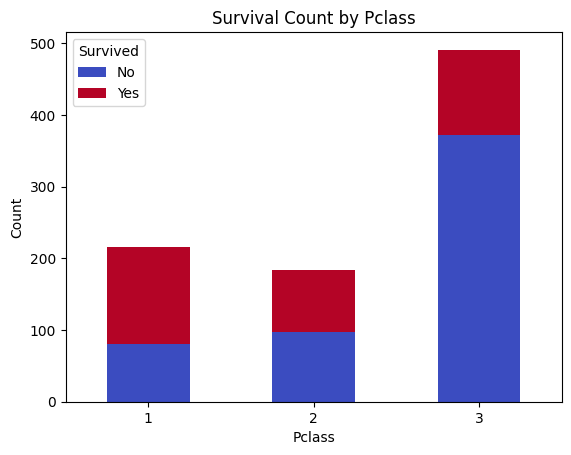

In [14]:
survival_counts_Pclass.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=0)  

plt.show()

In [15]:
survival_counts_Age = train.groupby('Age')['Survived'].value_counts().unstack().fillna(0)
survival_counts_Age

Survived,0,1
Age,,
0.42,0.0,1.0
0.67,0.0,1.0
0.75,0.0,2.0
0.83,0.0,2.0
0.92,0.0,1.0
...,...,...
70.00,2.0,0.0
70.50,1.0,0.0
71.00,2.0,0.0


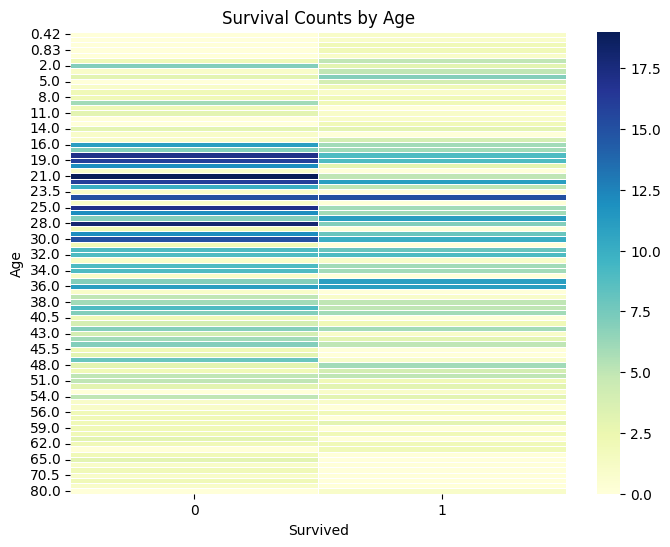

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(survival_counts_Age, annot=False, cmap='YlGnBu', cbar=True, linewidths=0.5)

# Customize labels and title
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Survival Counts by Age')

# Show the plot
plt.show()

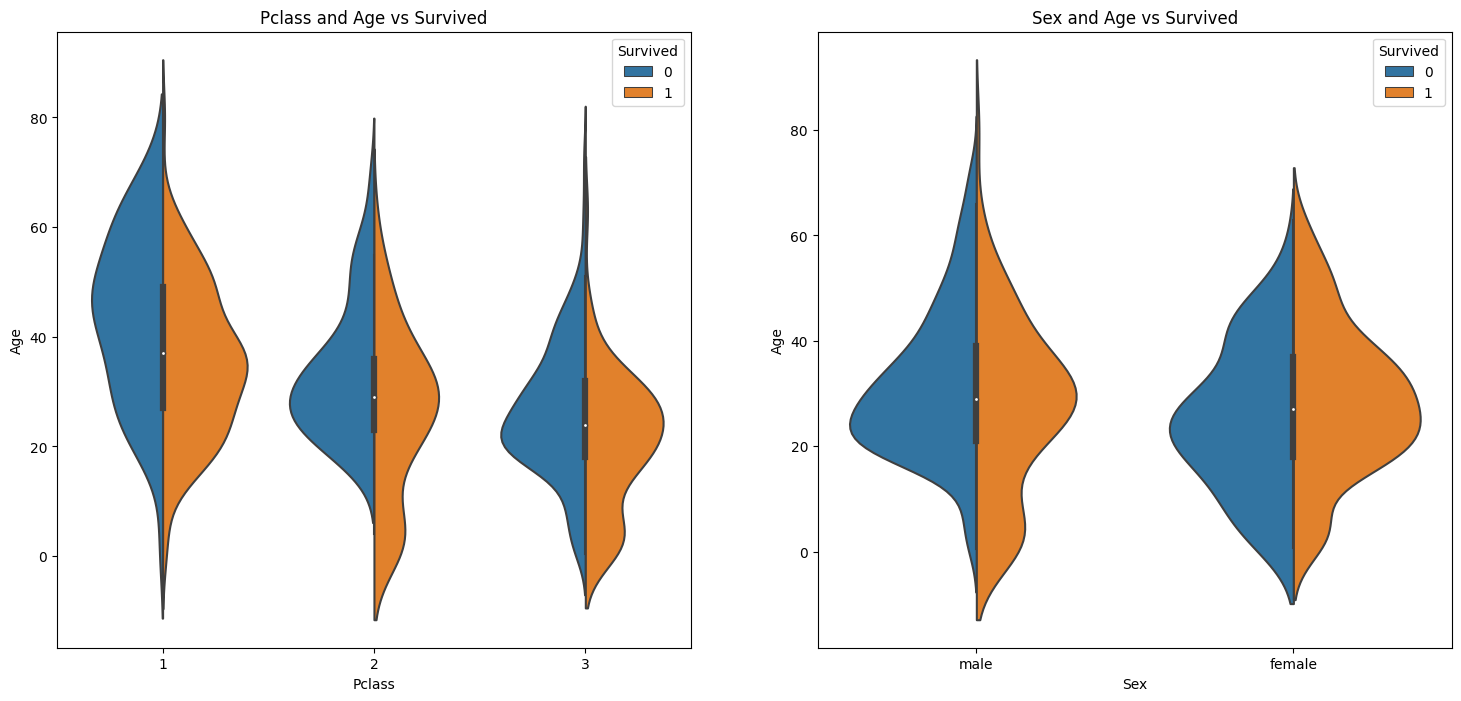

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')

sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')

plt.show()

Filling Missing Age values in train and test set

Got the information by the initial of each name and took the mean of the Age of each initial to replace NaN

In [18]:
import re

pattern = '([A-Za-z]+)\.'

train['Initials'] = train['Name'].str.extract(pattern)

train = train.drop(columns=['Name'])
train 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [19]:
mean_age_by_initials = train.groupby('Initials')['Age'].agg(['mean', 'count'])
mean_age_by_initials

,mean,count
Initials,,
Capt,70.000000,1
Col,58.000000,2
Countess,33.000000,1
Don,40.000000,1
Dr,42.000000,6
Jonkheer,38.000000,1
Lady,48.000000,1
Major,48.500000,2
Master,4.574167,36


In [20]:
mask = train['Age'].isna()

# Filter the DataFrame to get rows with NaN values and their associated initials
filtered_data = train.loc[mask, ['Age', 'Initials']]

# Calculate the count of NaN values for each initial
nan_counts = filtered_data['Initials'].value_counts().reset_index()
nan_counts.columns = ['Initial', 'Count']
nan_counts

,Initial,Count
0,Mr,119
1,Miss,36
2,Mrs,17
3,Master,4
4,Dr,1


Those are the missing Ages from Train dataset

In [21]:
train.loc[(train['Initials'] == 'Mr') & train['Age'].isna(), 'Age'] = 32
train.loc[(train['Initials'] == 'Miss') & train['Age'].isna(), 'Age'] = 22
train.loc[(train['Initials'] == 'Mrs') & train['Age'].isna(), 'Age'] = 36
train.loc[(train['Initials'] == 'Master') & train['Age'].isna(), 'Age'] = 5
train.loc[(train['Initials'] == 'Dr') & train['Age'].isna(), 'Age'] = 42
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,22.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


So i do the same with the Test dataset

In [22]:
pattern = '([A-Za-z]+)\.'

test['Initials'] = test['Name'].str.extract(pattern)

#test = test.drop(columns=['Name'])


mask1 = test['Age'].isna()

# Filter the DataFrame to get rows with NaN values and their associated initials
filtered_data = test.loc[mask1, ['Age', 'Initials']]

# Calculate the count of NaN values for each initial
nan_counts = filtered_data['Initials'].value_counts().reset_index()
nan_counts.columns = ['Initial', 'Count']
nan_counts

,Initial,Count
0,Mr,57
1,Miss,14
2,Mrs,10
3,Master,4
4,Ms,1


In [23]:
test.loc[(train['Initials'] == 'Mr') & test['Age'].isna(), 'Age'] = 32
test.loc[(train['Initials'] == 'Miss') & test['Age'].isna(), 'Age'] = 22
test.loc[(train['Initials'] == 'Mrs') & test['Age'].isna(), 'Age'] = 36
test.loc[(train['Initials'] == 'Master') & test['Age'].isna(), 'Age'] = 5
test.loc[(train['Initials'] == 'Ms') & test['Age'].isna(), 'Age'] = 28
test = test.drop(columns=['Name'])
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,32.0,0,0,8.0500,S,Mr
414,1306,1,female,39.0,0,0,108.9000,C,Dona
415,1307,3,male,38.5,0,0,7.2500,S,Mr
416,1308,3,male,36.0,0,0,8.0500,S,Mr


So all Age values are filled

Replace 2 Nan values in Embarked with S because S are the most values

In [24]:
train.loc[train['Embarked'].isna(), 'Embarked'] = 'S'
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Initials  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          417 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   Initials     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


1 Age and 1 Fare in  Test set is not filled.


In [26]:
n = test[test['Age'].isna()]
n['Initials'] = n['Initials'].str.strip()
print(n['Initials'])

249    Mrs
Name: Initials, dtype: object


/tmp/ipykernel_20/3068708862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['Initials'] = n['Initials'].str.strip()


In [27]:
test.at[249, 'Age'] = 36

In [28]:
nan_fare_pclass = test.loc[test['Fare'].isna(), 'Pclass']
nan_fare_pclass

152    3
Name: Pclass, dtype: int64

In [29]:
mean_fare_pclass3 = test[test['Pclass'] == 3]['Fare'].mean()
mean_fare_pclass3

12.459677880184334

In [30]:
test.at[152, 'Fare'] = mean_fare_pclass3

So, i used Initials to handle the missing values in Age. And Pclass for the Fare

Now i can drop Initials 

In [31]:
train = train.drop(columns=['Initials'])
test = test.drop(columns=['Initials'])
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,22.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [32]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
test['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,32.0,0,0,8.0500,0
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,0
416,1308,3,0,36.0,0,0,8.0500,0


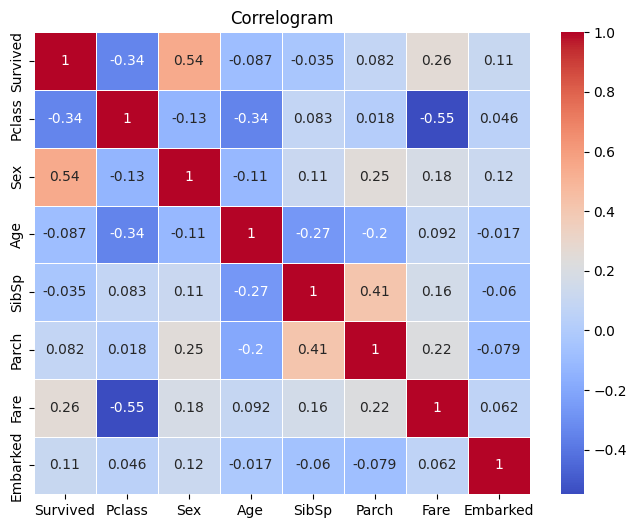

In [33]:
corr_matrix = train.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlogram')
plt.show()

In [34]:

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
prediction = model.predict(X_test)
acc_decision_tree = round(model.score(X_train, Y_train) * 100, 2)
acc_decision_tree


98.09

In [36]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [37]:
submission.to_csv('Submission Titanic EDA and Decision Tree', index=False)